In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=z*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

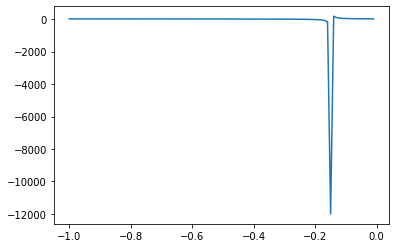

In [118]:
plt.figure()
x=np.arange(-0.99999,0,0.01)
plt.plot(x, continuidad(x, 6, np.sqrt(130)))

In [111]:
continuidad(-0.7717, 4, np.sqrt(70))

11.828609002114842

In [114]:
def hallarCeros(f,l, rho,toi=0.0005):
    g=np.arange(-0.99999,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 4, np.sqrt(70))

array([-0.256])

[0. 0. 1. 1. 2. 3.] [-0.818 -0.3   -0.63  -0.006 -0.399 -0.131]
[0. 0. 1. 1. 2. 3. 4.] [-0.85  -0.414 -0.694 -0.14  -0.501 -0.274 -0.018]
[0. 0. 1. 1. 2. 2. 3. 4.] [-0.872 -0.497 -0.739 -0.254 -0.573 -0.003 -0.376 -0.153]
[0. 0. 1. 2. 2. 3. 4. 5.] [-0.559 -0.062 -0.342 -0.626 -0.107 -0.454 -0.256 -0.036]
[0. 0. 1. 2. 3. 4. 5.] [-0.607 -0.149 -0.412 -0.197 -0.514 -0.337 -0.138]


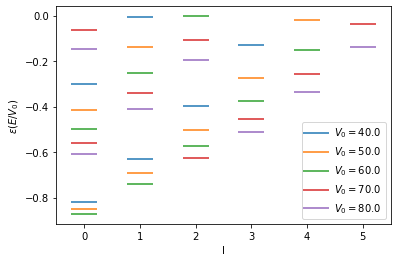

In [79]:
plt.figure()
rho=np.sqrt(np.arange(40,90,10))
l=np.arange(0,11,1)
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y)
    plt.scatter(x,y, s=700, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()
plt.ylabel(r"$\epsilon(E/V_0)$")
plt.xlabel("l")
plt.savefig("estadosLigados.png")

In [80]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*1j*np.sqrt(-x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,z)
    f=-g/h
    return f
    

In [81]:
def sigma(x, rho):
    s=0
    for i in range(100):
        d=tanDl(x,i,rho)/(np.sqrt(1+tanDl(x,i,rho)**2))
        s+=-4*np.pi*(2*i+1)*(abs(d))**2/(rho**2*x)
    return s

In [82]:
x=np.arange(-0.9999,0.0,0.0001)
C=np.zeros((len(rho), len(x)))
for i in range(len(rho)):
    C[i]=sigma(x,rho[i])

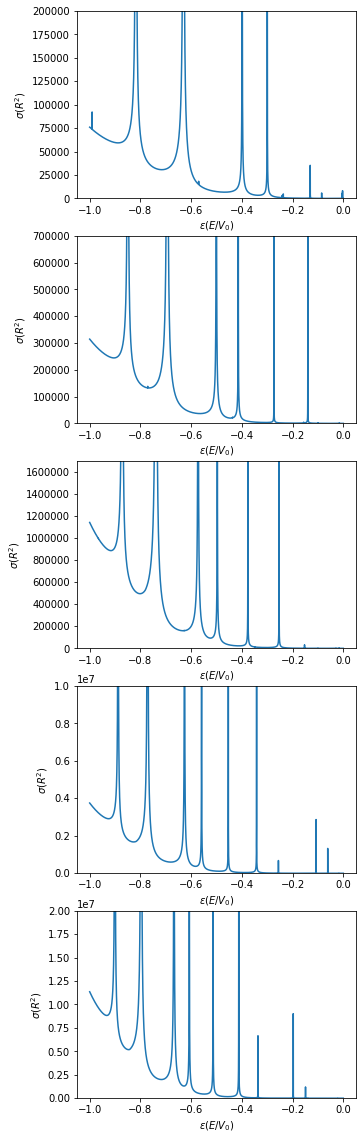

In [83]:
plt.figure(figsize=(5,20))
limites=np.array([200000,700000,1700000,10000000,20000000])
for i in range(len(rho)):
    plt.subplot(len(rho),1,i+1)
    plt.plot(x, C[i])
    plt.ylim(0,limites[i])
    plt.xlabel(r"$\epsilon(E/V_0)$")
    plt.ylabel(r"$\sigma(R^2)$")
plt.savefig("scatteringPlot.png")    

(-0.899, -0.902)

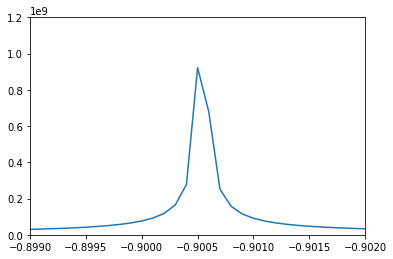

In [163]:
plt.figure()
x=np.arange(-0.9999,0.0,0.0001)
plt.plot(x, C[4])
plt.ylim(0,1200000000)
plt.xlim(-0.899,-0.902)

In [72]:
[-0.0055,-0.1306,-0.299,-0.3989,-0.6303,-0.8177]
[-0.1402,-0.2735,-0.4143,-0.5007,-0.6941,-0.8495]
[-0.0033, -0.153, -0.2535, -0.3763, -0.4968, -0.5726,-0.7387, -0.8716]
[-0.0616, -0.1074, -0.2559, -0.3421, -0.4535, -0.5589,-0.6262,-0.7717,-0.888]
[-0.1384, -0.1491, -0.1974, -0.3365, -0.4123, -0.5135, -0.6072, -0.6676, -0.7972, -0.]

[-0.0616, -0.1074, -0.2559, -0.3421, 0.4535, -0.5589]